# Problem Statement -Predict price of the second hand car

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('Data_Train.csv')
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [3]:
cars.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [4]:
cars.shape

(6019, 12)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 376.2+ KB


In [6]:
#Splitting company name from CarName column
CompanyName = cars['Name'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
#cars.drop(['Name'],axis=1,inplace=True)
cars.head()

,Name,Location,Year,CompanyName,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,Maruti,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Hyundai,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,Honda,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,Maruti,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Audi,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
cars.CompanyName.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [8]:
cars.CompanyName = cars.CompanyName.str.lower()
cars.CompanyName.unique()

array(['maruti', 'hyundai', 'honda', 'audi', 'nissan', 'toyota',
       'volkswagen', 'tata', 'land', 'mitsubishi', 'renault',
       'mercedes-benz', 'bmw', 'mahindra', 'ford', 'porsche', 'datsun',
       'jaguar', 'volvo', 'chevrolet', 'skoda', 'mini', 'fiat', 'jeep',
       'smart', 'ambassador', 'isuzu', 'force', 'bentley', 'lamborghini'],
      dtype=object)

In [9]:
cars.columns

Index(['Name', 'Location', 'Year', 'CompanyName', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [10]:
cars['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [11]:
cars['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [12]:
cars.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493
Seats,0.012333,0.083113,1.000000,0.052225
Price,0.305327,-0.011493,0.052225,1.000000


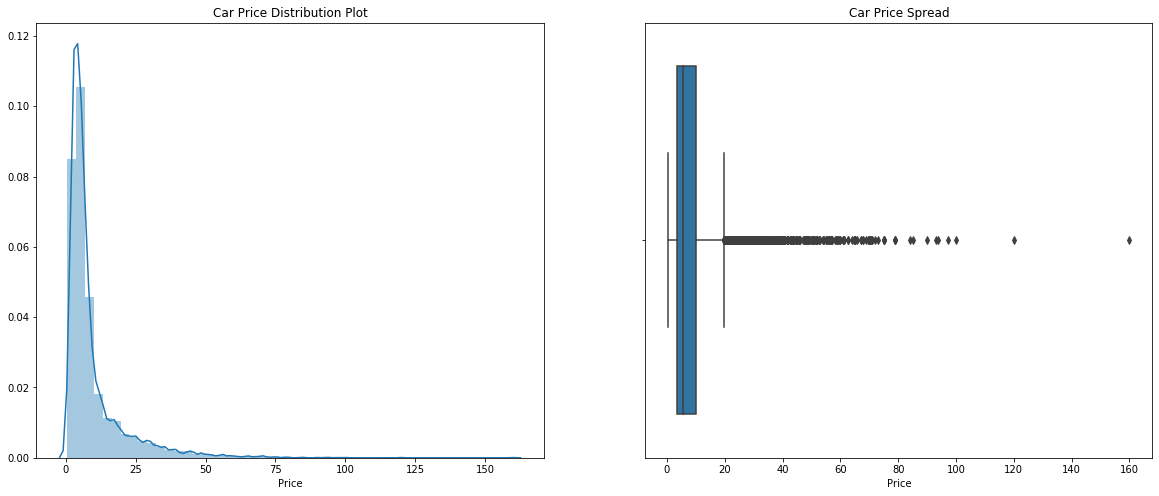

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(x=cars.Price)

plt.show()

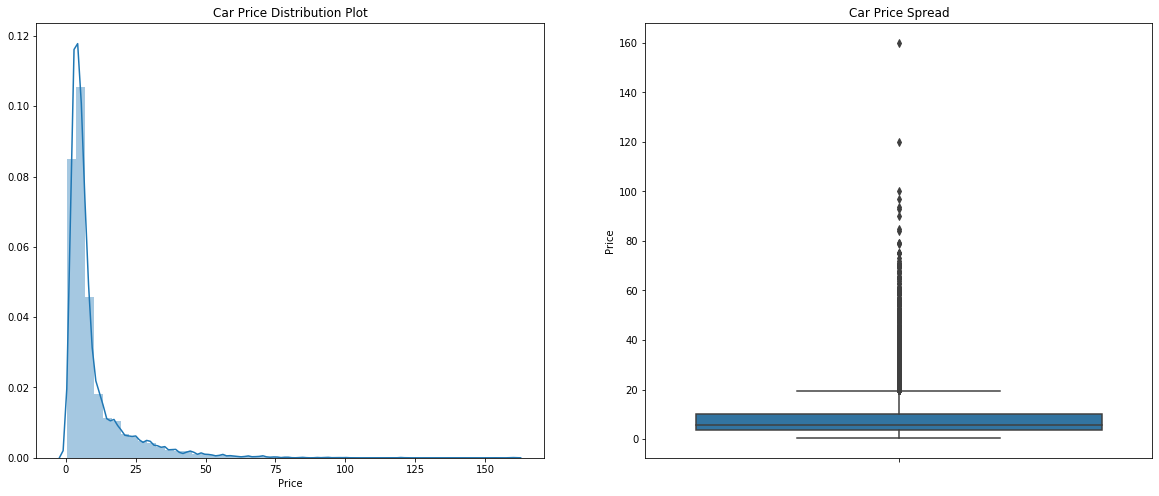

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.Price)

plt.show()

In [15]:
print(cars.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
85%        16.500000
90%        22.500000
100%      160.000000
max       160.000000
Name: Price, dtype: float64


In [16]:
#right skewed data
#most of the price is below 16.5(85%)
#since the SD value is high so it means that price is spread out from mean,variance is high
#85% below 16.5 and rest15% till 160

# CLEAN DATA

In [17]:
cars.isnull()

,Name,Location,Year,CompanyName,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,False,False,False,False,False,False,False,False,False,False,False,False,False
6015,False,False,False,False,False,False,False,False,False,False,False,False,False
6016,False,False,False,False,False,False,False,False,False,False,False,False,False
6017,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
cars.isnull().sum()

Name                  0
Location              0
Year                  0
CompanyName           0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [19]:
cars['Engine'] = cars['Engine'].str.replace(r'\D', '')
cars.head()

,Name,Location,Year,CompanyName,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,maruti,72000,CNG,Manual,First,26.6 km/kg,998,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,hyundai,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,honda,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,maruti,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,audi,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8 bhp,5.0,17.74


In [20]:
cars['Engine'].median()

1493.0

In [21]:
cars['Engine'].replace(np.NaN,cars['Engine'].median())

0        998
1       1582
2       1199
3       1248
4       1968
        ... 
6014    1248
6015    1120
6016    2498
6017     998
6018     936
Name: Engine, Length: 6019, dtype: object

In [22]:
cars.dropna(inplace=True)

In [23]:
power_list = list(cars['Power'])

In [24]:
power=[]

In [25]:
for name in power_list:
    power.append(name.split()[0])

In [26]:
cars['Power'] = power

In [27]:
cars = cars[cars['Power'] != 'null' ]

In [28]:
cars.shape

(5872, 13)

In [29]:
cars['Power'] = cars['Power'].astype('float')

In [30]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   CompanyName        5872 non-null   object 
 4   Kilometers_Driven  5872 non-null   int64  
 5   Fuel_Type          5872 non-null   object 
 6   Transmission       5872 non-null   object 
 7   Owner_Type         5872 non-null   object 
 8   Mileage            5872 non-null   object 
 9   Engine             5872 non-null   object 
 10  Power              5872 non-null   float64
 11  Seats              5872 non-null   float64
 12  Price              5872 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 458.8+ KB


In [31]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
CompanyName          0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [32]:
cars['Mileage'] = cars['Mileage'].str.replace(r'\D', '')
cars.head()

,Name,Location,Year,CompanyName,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,maruti,72000,CNG,Manual,First,266,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,hyundai,41000,Diesel,Manual,First,1967,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,honda,46000,Petrol,Manual,First,182,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,maruti,87000,Diesel,Manual,First,2077,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,audi,40670,Diesel,Automatic,Second,152,1968,140.80,5.0,17.74


In [33]:
cars['engine']=cars['Engine'].copy().astype('float')

In [34]:
cars['mileage']=cars['Mileage'].copy().astype('float')

In [35]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   CompanyName        5872 non-null   object 
 4   Kilometers_Driven  5872 non-null   int64  
 5   Fuel_Type          5872 non-null   object 
 6   Transmission       5872 non-null   object 
 7   Owner_Type         5872 non-null   object 
 8   Mileage            5872 non-null   object 
 9   Engine             5872 non-null   object 
 10  Power              5872 non-null   float64
 11  Seats              5872 non-null   float64
 12  Price              5872 non-null   float64
 13  engine             5872 non-null   float64
 14  mileage            5872 non-null   float64
dtypes: float64(5), int64(2), object(8)
memory usage: 550.5+ KB


# EXPLORATORY DATA ANALYSIS

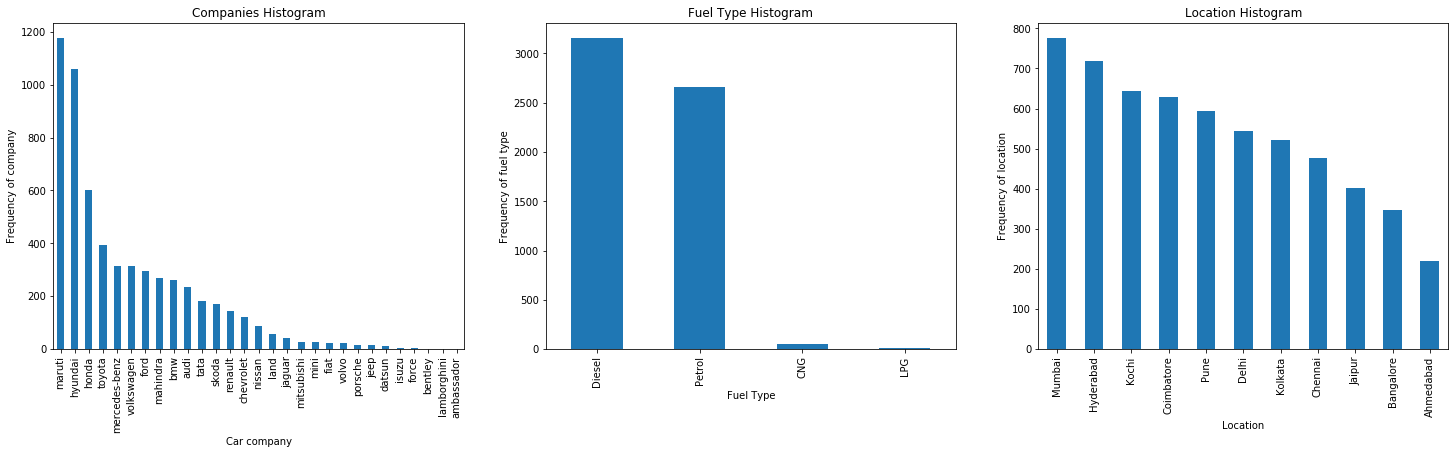

In [36]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.Fuel_Type.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.Location.value_counts().plot(kind='bar')
plt.title('Location Histogram')
plt1.set(xlabel = 'Location', ylabel='Frequency of location')

plt.show()

In [37]:
#maruti is favored car company
#diesel is used most
#mumbai is best preffered location


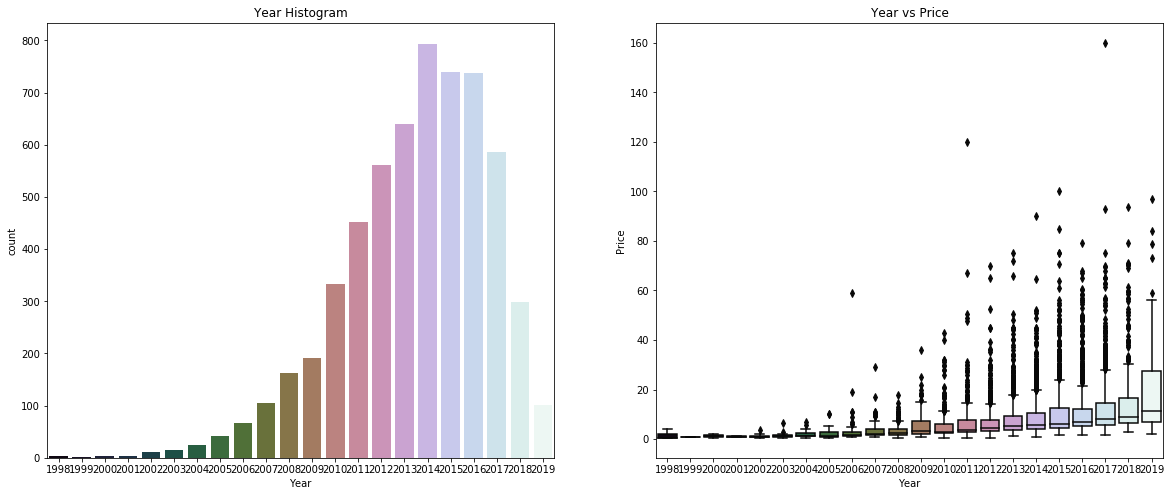

In [38]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Year Histogram')
sns.countplot(cars.Year, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Year vs Price')
sns.boxplot(x=cars.Year, y=cars.Price, palette=("cubehelix"))

plt.show()

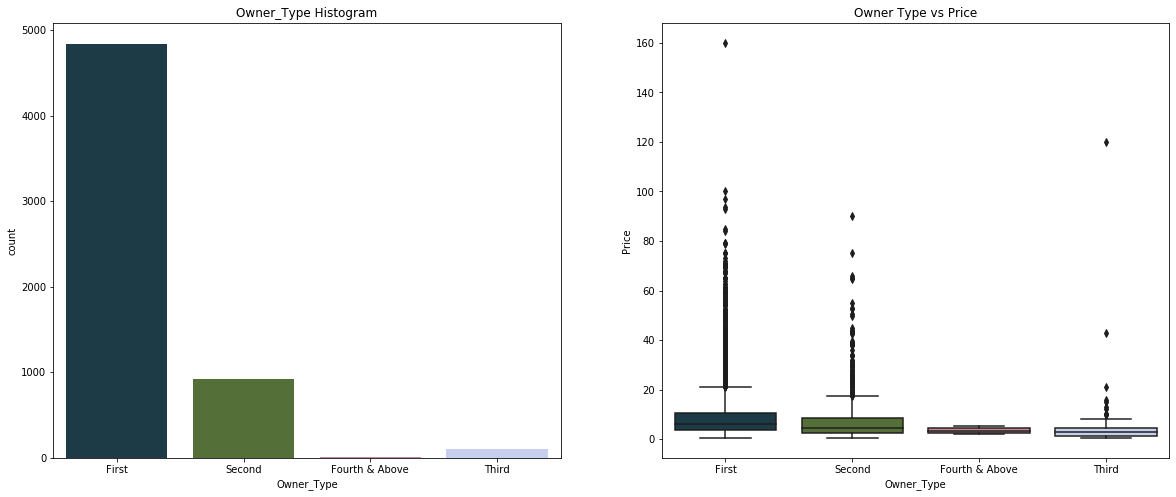

In [39]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Owner_Type Histogram')
sns.countplot(cars.Owner_Type, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Owner Type vs Price')
sns.boxplot(x=cars.Owner_Type, y=cars.Price, palette=("cubehelix"))

plt.show()

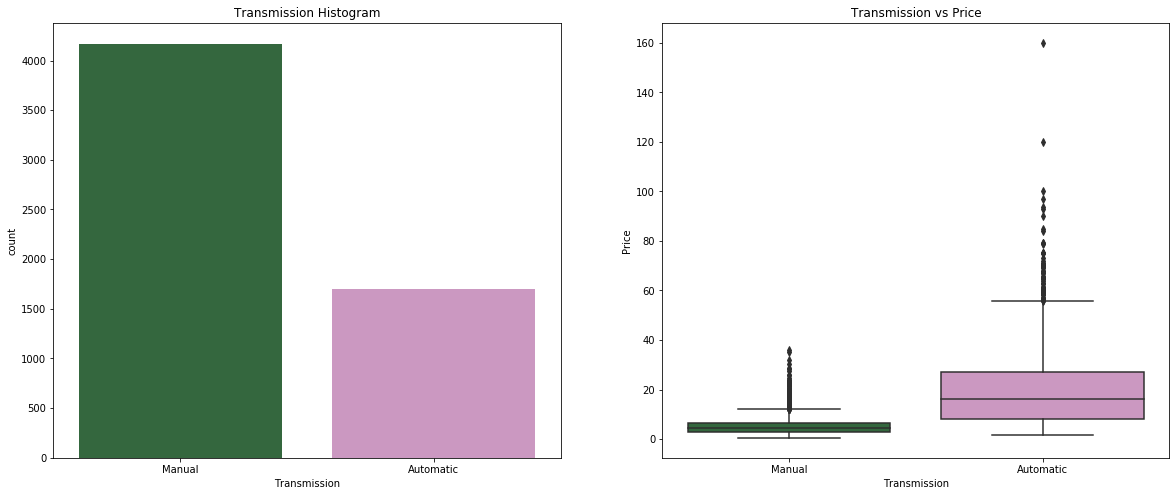

In [40]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Transmission Histogram')
sns.countplot(cars.Transmission, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Transmission vs Price')
sns.boxplot(x=cars.Transmission, y=cars.Price, palette=("cubehelix"))

plt.show() 

In [41]:
#automatic car has higher price than manual car but manual is bought more

<Figure size 1800x432 with 0 Axes>

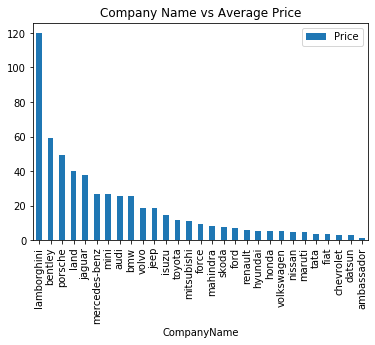

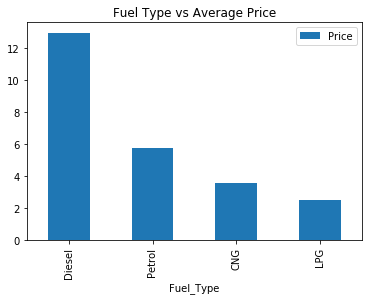

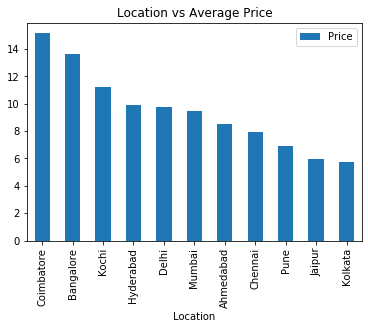

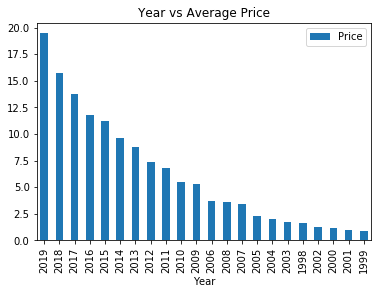

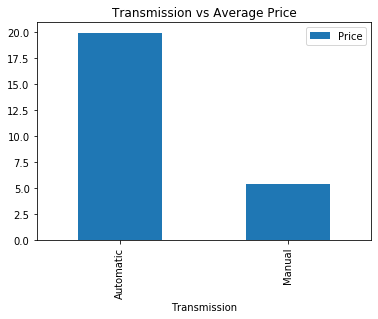

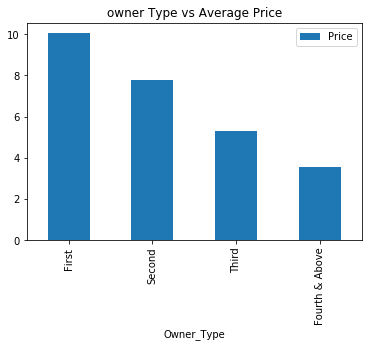

In [42]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['Fuel_Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['Location'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Location vs Average Price')
plt.show()
df = pd.DataFrame(cars.groupby(['Year'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Year vs Average Price')
plt.show()
df = pd.DataFrame(cars.groupby(['Transmission'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Transmission vs Average Price')
plt.show()
df = pd.DataFrame(cars.groupby(['Owner_Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('owner Type vs Average Price')
plt.show()

In [43]:
#lamborghini has highest avg price and ambassador has least
#electric and disesel have highest avg price
#coimbatore has highest avg price
#2019 has highest avg price
#automatic has highest avg price
#first hand has highest avg price

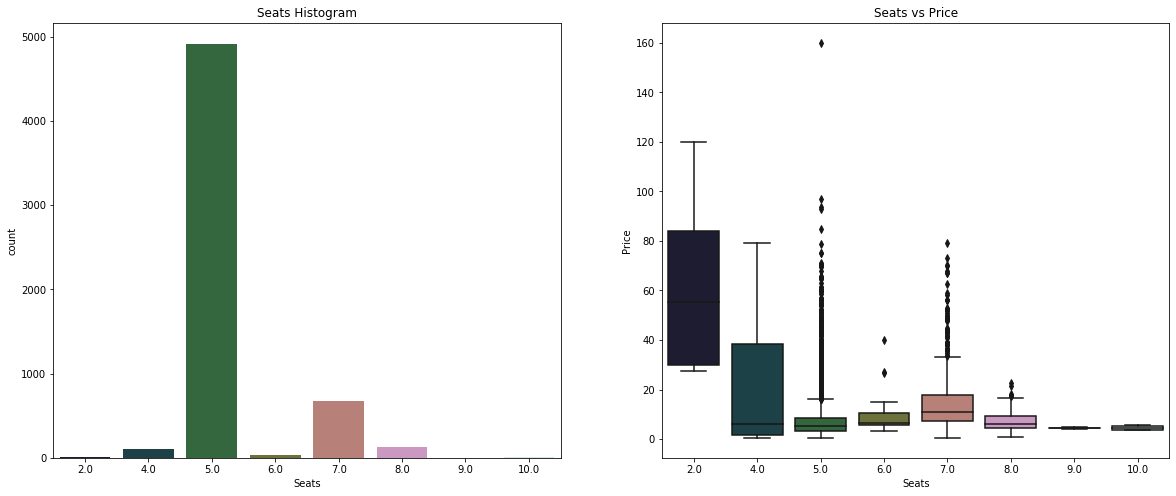

In [44]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Seats Histogram')
sns.countplot(cars.Seats, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Seats vs Price')
sns.boxplot(x=cars.Seats, y=cars.Price, palette=("cubehelix"))

plt.show()

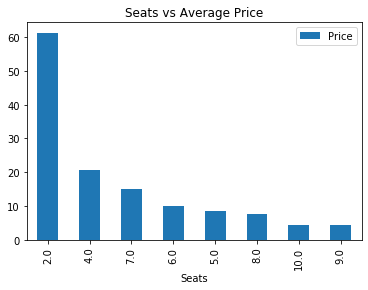

In [45]:
df = pd.DataFrame(cars.groupby(['Seats'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Seats vs Average Price')
plt.show()

In [46]:
#2 seater have highest avg price and 9,10 have least

numerical data

In [47]:
#engine
#power
#mileage

<Figure size 720x1440 with 0 Axes>

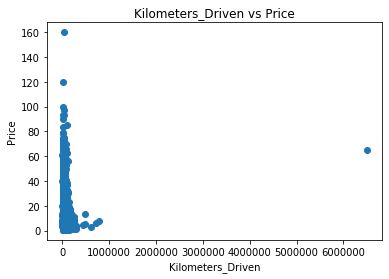

<Figure size 720x1440 with 0 Axes>

In [48]:
plt.scatter(cars['Kilometers_Driven'],cars['Price'])
plt.title('Kilometers_Driven vs Price')
plt.ylabel('Price')
plt.xlabel('Kilometers_Driven')
plt.figure(figsize=(10,20))


<Figure size 720x1440 with 0 Axes>

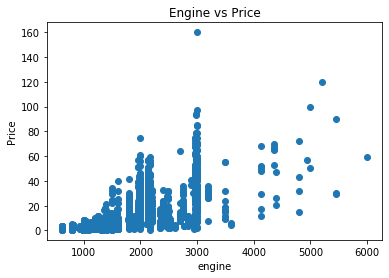

<Figure size 720x1440 with 0 Axes>

In [49]:
plt.scatter(cars['engine'],cars['Price'])
plt.title('Engine vs Price')
plt.ylabel('Price')
plt.xlabel('engine')
plt.figure(figsize=(10,20))


<Figure size 720x1440 with 0 Axes>

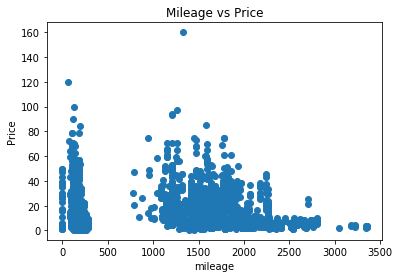

<Figure size 720x1440 with 0 Axes>

In [50]:
plt.scatter(cars['mileage'],cars['Price'])
plt.title('Mileage vs Price')
plt.ylabel('Price')
plt.xlabel('mileage')
plt.figure(figsize=(10,20))


<Figure size 720x1440 with 0 Axes>

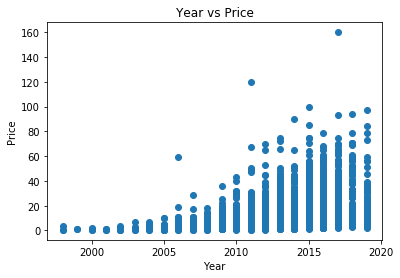

<Figure size 720x1440 with 0 Axes>

In [51]:
plt.scatter(cars['Year'],cars['Price'])
plt.title('Year vs Price')
plt.ylabel('Price')
plt.xlabel('Year')
plt.figure(figsize=(10,20))


In [52]:
#positive correlation with price


In [53]:
np.corrcoef(cars['engine'], cars['Price'])[0,1]#corr value btw 0 to 1

0.6580472262886946

In [54]:
np.corrcoef(cars['Kilometers_Driven'], cars['Year'])[0,1]#[0,1]#corr value btw 0 to 1

-0.1693685787437555

In [55]:
np.corrcoef(cars['Price'], cars['Year'])[0, 1]#corr value btw 0 to 1

0.2994754501870608

In [56]:
np.corrcoef(cars['mileage'], cars['Price'])[0,1]#corr value btw 0 to 1

0.09151209039815161

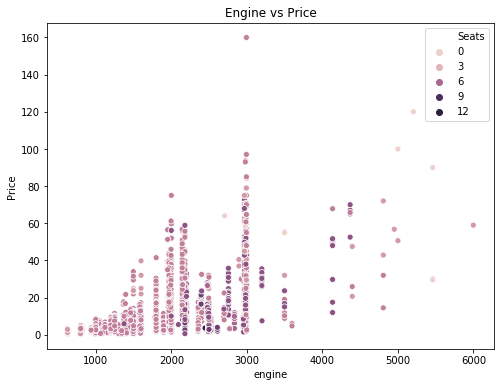

<Figure size 432x288 with 0 Axes>

In [57]:
plt.figure(figsize=(8,6))

plt.title('Engine vs Price')
sns.scatterplot(x=cars['engine'],y=cars['Price'],hue=cars['Seats'])
plt.xlabel('engine')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

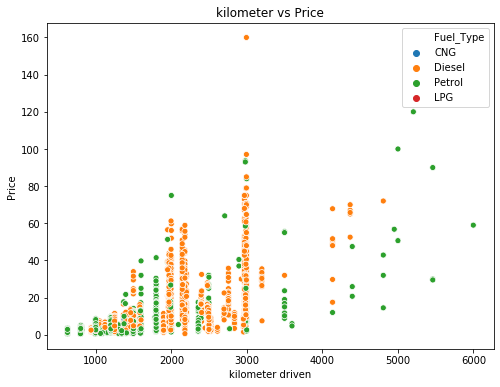

<Figure size 432x288 with 0 Axes>

In [58]:
plt.figure(figsize=(8,6))

plt.title('kilometer vs Price')
sns.scatterplot(x=cars['engine'],y=cars['Price'],hue=cars['Fuel_Type'])
plt.xlabel('kilometer driven')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

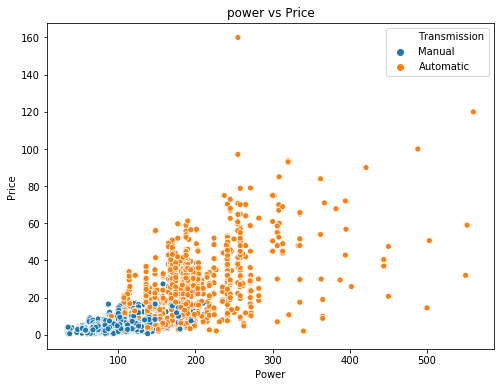

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(8,6))

plt.title('power vs Price')
sns.scatterplot(x=cars['Power'],y=cars['Price'],hue=cars['Transmission'])
plt.xlabel('Power')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

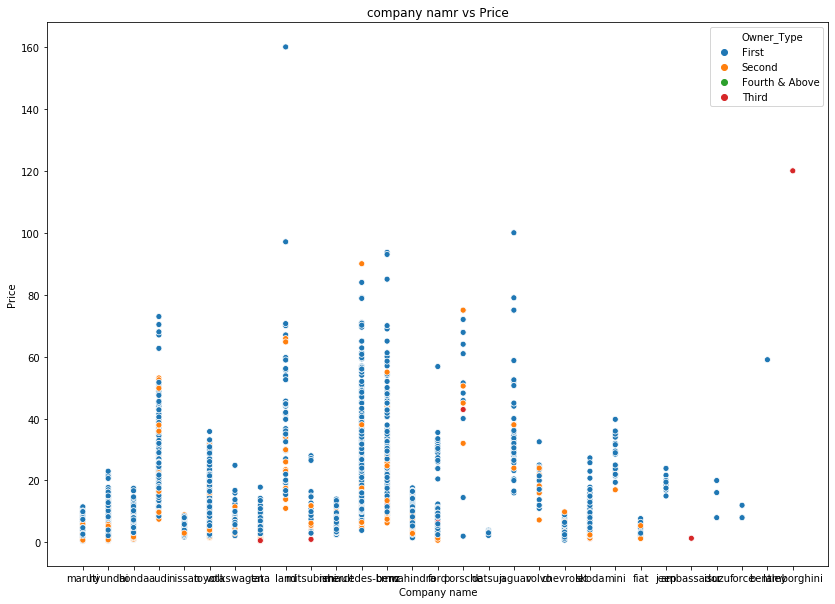

<Figure size 432x288 with 0 Axes>

In [60]:
plt.figure(figsize=(14,10))

plt.title('company namr vs Price')
sns.scatterplot(x=cars['CompanyName'],y=cars['Price'],hue=cars['Owner_Type'])
plt.xlabel('Company name')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

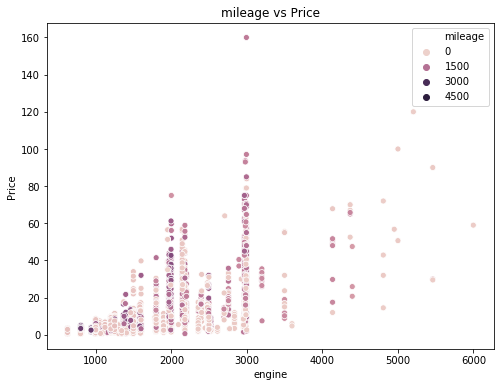

<Figure size 432x288 with 0 Axes>

In [61]:
plt.figure(figsize=(8,6))

plt.title('mileage vs Price')
sns.scatterplot(x=cars['engine'],y=cars['Price'],hue=cars['mileage'])
plt.xlabel('engine')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

In [62]:
#fuel
#location
#year
#transmission
#owner type

In [63]:
cars_imp=cars[['CompanyName','Fuel_Type','Location','Year','Transmission','Owner_Type','engine','Power','mileage','Kilometers_Driven','Seats','Price']]

In [64]:
cars_imp.head()

,CompanyName,Fuel_Type,Location,Year,Transmission,Owner_Type,engine,Power,mileage,Kilometers_Driven,Seats,Price
0,maruti,CNG,Mumbai,2010,Manual,First,998.0,58.16,266.0,72000,5.0,1.75
1,hyundai,Diesel,Pune,2015,Manual,First,1582.0,126.20,1967.0,41000,5.0,12.50
2,honda,Petrol,Chennai,2011,Manual,First,1199.0,88.70,182.0,46000,5.0,4.50
3,maruti,Diesel,Chennai,2012,Manual,First,1248.0,88.76,2077.0,87000,7.0,6.00
4,audi,Diesel,Coimbatore,2013,Automatic,Second,1968.0,140.80,152.0,40670,5.0,17.74


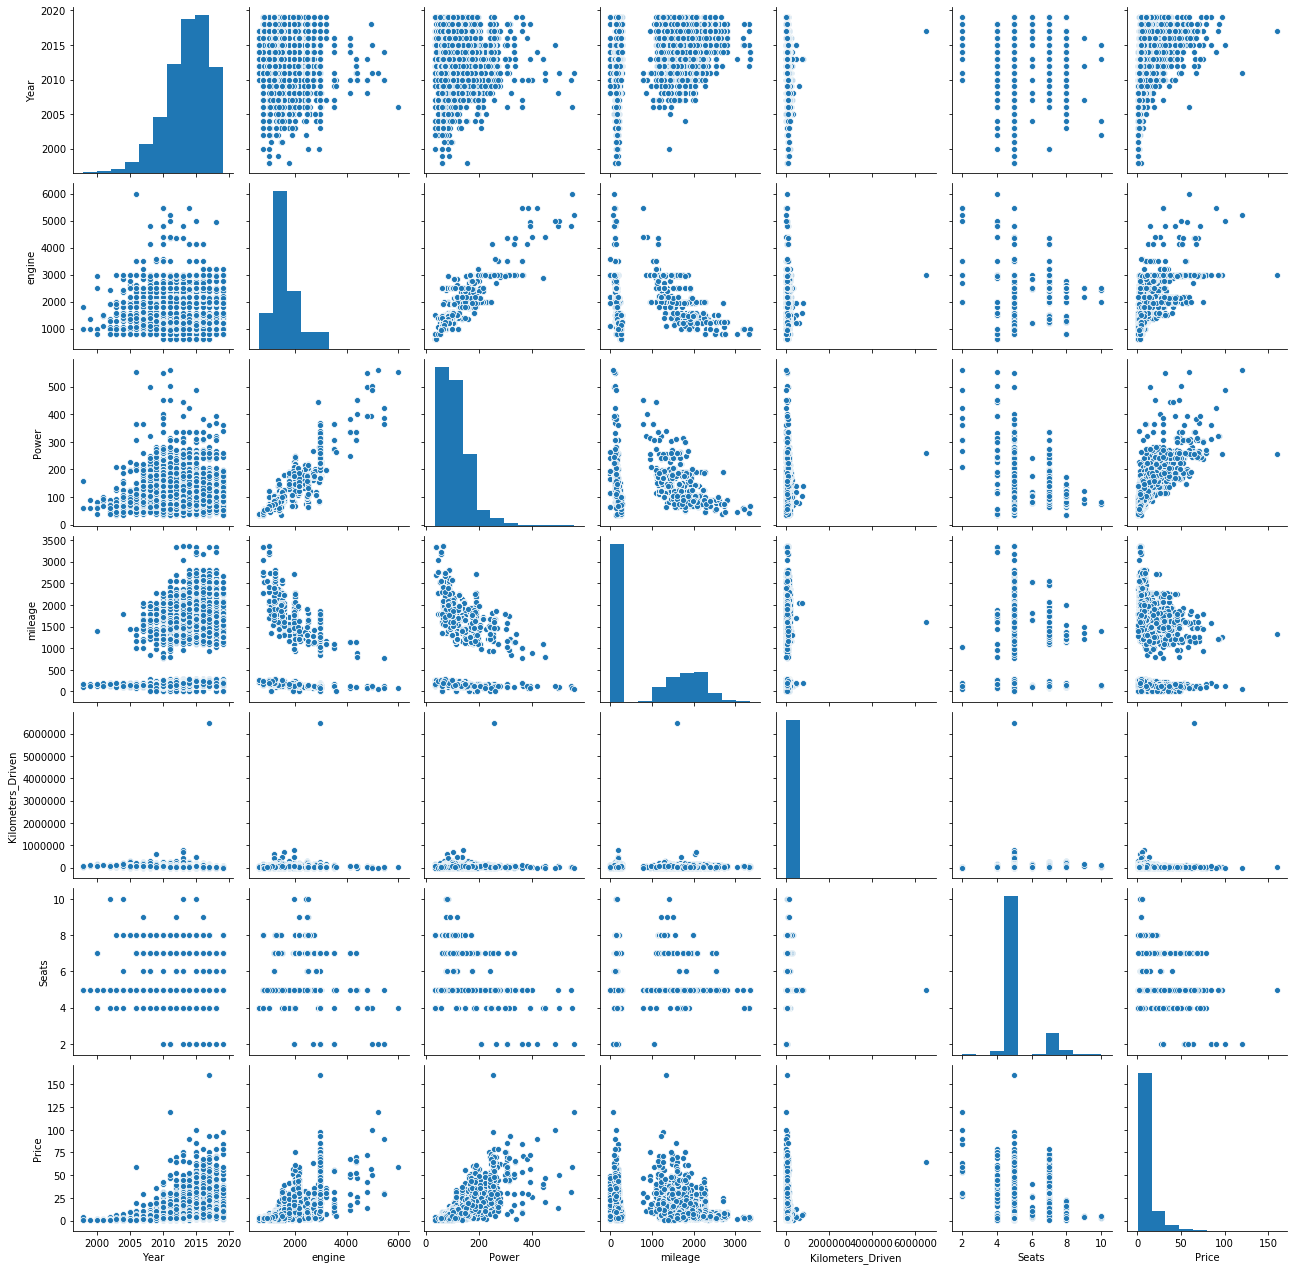

In [65]:
sns.pairplot(cars_imp)
plt.show()

# ONE HOT ENCODING

In [66]:
fuel_type=pd.get_dummies(cars['Fuel_Type'], drop_first = True)

In [67]:
owner_type= pd.get_dummies(cars['Owner_Type'], drop_first = True)

In [68]:
transmission= pd.get_dummies(cars['Transmission'], drop_first = True)

In [69]:
cars=pd.concat([cars,fuel_type,owner_type,transmission],axis=1)

In [70]:
cars.head(20)

,Name,Location,Year,CompanyName,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Price,engine,mileage,Diesel,LPG,Petrol,Fourth & Above,Second,Third,Manual
0,Maruti Wagon R LXI CNG,Mumbai,2010,maruti,72000,CNG,Manual,First,266,998,...,1.75,998.0,266.0,0,0,0,0,0,0,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,hyundai,41000,Diesel,Manual,First,1967,1582,...,12.50,1582.0,1967.0,1,0,0,0,0,0,1
2,Honda Jazz V,Chennai,2011,honda,46000,Petrol,Manual,First,182,1199,...,4.50,1199.0,182.0,0,0,1,0,0,0,1
3,Maruti Ertiga VDI,Chennai,2012,maruti,87000,Diesel,Manual,First,2077,1248,...,6.00,1248.0,2077.0,1,0,0,0,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,audi,40670,Diesel,Automatic,Second,152,1968,...,17.74,1968.0,152.0,1,0,0,0,1,0,0
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,hyundai,75000,LPG,Manual,First,211,814,...,2.35,814.0,211.0,0,1,0,0,0,0,1
6,Nissan Micra Diesel XV,Jaipur,2013,nissan,86999,Diesel,Manual,First,2308,1461,...,3.50,1461.0,2308.0,1,0,0,0,0,0,1
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,toyota,36000,Diesel,Automatic,First,1136,2755,...,17.50,2755.0,1136.0,1,0,0,0,0,0,0
8,Volkswagen Vento Diesel Comfortline,Pune,2013,volkswagen,64430,Diesel,Manual,First,2054,1598,...,5.20,1598.0,2054.0,1,0,0,0,0,0,1
9,Tata Indica Vista Quadrajet LS,Chennai,2012,tata,65932,Diesel,Manual,Second,223,1248,...,1.95,1248.0,223.0,1,0,0,0,1,0,1


In [71]:
cars.drop(['Fuel_Type','Owner_Type','Transmission','Engine','Mileage'],axis=1,inplace=True)
cars.head()

,Name,Location,Year,CompanyName,Kilometers_Driven,Power,Seats,Price,engine,mileage,Diesel,LPG,Petrol,Fourth & Above,Second,Third,Manual
0,Maruti Wagon R LXI CNG,Mumbai,2010,maruti,72000,58.16,5.0,1.75,998.0,266.0,0,0,0,0,0,0,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,hyundai,41000,126.20,5.0,12.50,1582.0,1967.0,1,0,0,0,0,0,1
2,Honda Jazz V,Chennai,2011,honda,46000,88.70,5.0,4.50,1199.0,182.0,0,0,1,0,0,0,1
3,Maruti Ertiga VDI,Chennai,2012,maruti,87000,88.76,7.0,6.00,1248.0,2077.0,1,0,0,0,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,audi,40670,140.80,5.0,17.74,1968.0,152.0,1,0,0,0,1,0,0


# LABEL ENCODER

In [72]:
cars['Location'].unique()
cars['CompanyName'].unique()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cars_imp[['CompanyName','Location']]=cars_imp[['CompanyName','Location']].apply(le.fit_transform)
cars_imp


,CompanyName,Fuel_Type,Location,Year,Transmission,Owner_Type,engine,Power,mileage,Kilometers_Driven,Seats,Price
0,17,CNG,9,2010,Manual,First,998.0,58.16,266.0,72000,5.0,1.75
1,10,Diesel,10,2015,Manual,First,1582.0,126.20,1967.0,41000,5.0,12.50
2,9,Petrol,2,2011,Manual,First,1199.0,88.70,182.0,46000,5.0,4.50
3,17,Diesel,2,2012,Manual,First,1248.0,88.76,2077.0,87000,7.0,6.00
4,1,Diesel,3,2013,Automatic,Second,1968.0,140.80,152.0,40670,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,17,Diesel,4,2014,Manual,First,1248.0,74.00,284.0,27365,5.0,4.75
6015,10,Diesel,6,2015,Manual,First,1120.0,71.00,244.0,100000,5.0,4.00
6016,16,Diesel,6,2012,Manual,Second,2498.0,112.00,140.0,55000,8.0,2.90
6017,17,Petrol,8,2013,Manual,First,998.0,67.10,189.0,46000,5.0,2.65


In [73]:
cars[['CompanyName','Location']]=cars[['CompanyName','Location']].apply(le.fit_transform)
cars

,Name,Location,Year,CompanyName,Kilometers_Driven,Power,Seats,Price,engine,mileage,Diesel,LPG,Petrol,Fourth & Above,Second,Third,Manual
0,Maruti Wagon R LXI CNG,9,2010,17,72000,58.16,5.0,1.75,998.0,266.0,0,0,0,0,0,0,1
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,10,41000,126.20,5.0,12.50,1582.0,1967.0,1,0,0,0,0,0,1
2,Honda Jazz V,2,2011,9,46000,88.70,5.0,4.50,1199.0,182.0,0,0,1,0,0,0,1
3,Maruti Ertiga VDI,2,2012,17,87000,88.76,7.0,6.00,1248.0,2077.0,1,0,0,0,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,3,2013,1,40670,140.80,5.0,17.74,1968.0,152.0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,4,2014,17,27365,74.00,5.0,4.75,1248.0,284.0,1,0,0,0,0,0,1
6015,Hyundai Xcent 1.1 CRDi S,6,2015,10,100000,71.00,5.0,4.00,1120.0,244.0,1,0,0,0,0,0,1
6016,Mahindra Xylo D4 BSIV,6,2012,16,55000,112.00,8.0,2.90,2498.0,140.0,1,0,0,0,1,0,1
6017,Maruti Wagon R VXI,8,2013,17,46000,67.10,5.0,2.65,998.0,189.0,0,0,1,0,0,0,1


# TRAIN TEST SPLIT

In [74]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

y= cars['Price']
X= cars[['CompanyName','Location','Year','engine','Power','mileage','Kilometers_Driven','Seats','LPG','Diesel','Petrol','Manual','Fourth & Above','Second','Third']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4697, 15) (4697,)
(1175, 15) (1175,)


# FEATURE SCALING

In [75]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# MIN MAX SCALER

In [76]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
X_train

array([[0.82142857, 0.7       , 0.85714286, ..., 0.        , 0.        ,
        0.        ],
       [0.89285714, 0.2       , 0.9047619 , ..., 0.        , 0.        ,
        0.        ],
       [0.35714286, 0.4       , 0.9047619 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.28571429, 1.        , 0.42857143, ..., 1.        , 0.        ,
        0.        ],
       [0.60714286, 0.5       , 0.9047619 , ..., 0.        , 0.        ,
        0.        ],
       [0.60714286, 0.8       , 0.85714286, ..., 0.        , 0.        ,
        0.        ]])

In [77]:
X.describe()

,CompanyName,Location,Year,engine,Power,mileage,Kilometers_Driven,Seats,LPG,Diesel,Petrol,Manual,Fourth & Above,Second,Third
count,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,14.678134,5.614101,2013.477691,1625.745572,113.276894,868.683072,5.831700e+04,5.283719,0.001703,0.536785,0.452146,0.710150,0.001192,0.157527,0.017200
std,7.327366,2.950323,3.164568,601.641783,53.881892,861.102551,9.216941e+04,0.805081,0.041236,0.498688,0.497747,0.453731,0.034509,0.364328,0.130028
min,0.000000,0.000000,1998.000000,624.000000,34.200000,0.000000,1.710000e+02,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3.000000,2012.000000,1198.000000,75.000000,175.000000,3.342250e+04,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,6.000000,2014.000000,1495.500000,97.700000,231.000000,5.260900e+04,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,18.000000,8.000000,2016.000000,1991.000000,138.100000,1701.000000,7.240275e+04,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,28.000000,10.000000,2019.000000,5998.000000,560.000000,3354.000000,6.500000e+06,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Random Forest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [79]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [80]:
predict = model.predict(X_test)

In [81]:
predict

array([ 1.137, 13.395,  2.129, ...,  3.829, 12.62 ,  3.483])

In [82]:
list(y_test)

[0.85,
 10.94,
 3.0,
 16.0,
 4.95,
 6.6,
 11.56,
 8.25,
 8.6,
 4.75,
 38.5,
 30.0,
 3.59,
 3.99,
 8.15,
 2.25,
 56.0,
 42.0,
 9.51,
 6.85,
 11.52,
 2.25,
 3.85,
 19.5,
 8.75,
 5.5,
 39.51,
 9.95,
 14.35,
 5.25,
 3.5,
 4.5,
 6.5,
 29.5,
 3.25,
 2.9,
 2.0,
 7.23,
 7.99,
 10.5,
 2.75,
 8.0,
 3.3,
 39.05,
 4.0,
 1.38,
 6.25,
 11.96,
 9.19,
 5.95,
 54.0,
 3.25,
 2.44,
 3.0,
 12.99,
 8.18,
 5.8,
 20.0,
 29.0,
 3.75,
 2.9,
 6.13,
 5.5,
 14.6,
 50.66,
 51.52,
 4.75,
 1.55,
 4.95,
 5.15,
 2.85,
 4.95,
 17.75,
 3.25,
 17.0,
 19.85,
 1.8,
 6.5,
 3.1,
 5.85,
 6.75,
 15.0,
 6.99,
 70.0,
 17.5,
 5.1,
 33.63,
 2.7,
 1.6,
 4.65,
 8.01,
 10.75,
 6.58,
 15.0,
 5.9,
 5.5,
 7.88,
 3.5,
 8.75,
 7.25,
 2.25,
 2.25,
 26.5,
 4.25,
 6.0,
 6.14,
 5.0,
 11.0,
 8.4,
 6.0,
 13.78,
 4.9,
 10.34,
 3.85,
 1.95,
 2.22,
 6.5,
 17.5,
 7.75,
 27.15,
 55.0,
 8.15,
 14.5,
 5.75,
 26.5,
 8.41,
 7.52,
 3.45,
 3.52,
 2.0,
 6.75,
 22.0,
 4.55,
 2.45,
 18.0,
 64.95,
 5.55,
 10.5,
 6.42,
 3.47,
 1.6,
 2.5,
 2.8,
 35.28,
 1.3,
 6

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
mse = mean_squared_error(y_test, predict)

In [85]:
mse

11.021527578238771

In [86]:
r2_score(y_test, predict)

0.9209551532553724

In [87]:
rmse = np.sqrt(mse)

In [88]:
rmse

3.3198686085805824

# Gradient Booster Regressor

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
learning_rate = 0.1
#n_estimators = list(range(700,800))
#for n in n_estimators:
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=800)
gbr.fit(X_train, y_train)
#gbr.fit(X_train, y_train)
print(gbr.score(X_test, y_test))

0.9319200953850855


In [91]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predict)
mse

11.021527578238771

In [92]:
r2_score(y_test, predict)

0.9209551532553724

# Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [94]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
lr.score(X_train,y_train)

0.6925059314134081

In [96]:
lr_pred=lr.predict(X_test)
print('MSE:',mean_squared_error(lr_pred,y_test))
print('MAE:',mean_absolute_error(lr_pred,y_test))
print('r2_score:',r2_score(y_test,lr_pred))

MSE: 38.79517074166684
MAE: 3.8325865060979716
r2_score: 0.7217664879992299


# SVM

In [97]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


In [98]:
svc=SVR()
svc.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [99]:
svc.score(X_train,y_train)


0.5397191319556318

In [100]:
svc_pred=svc.predict(X_test)
print('MSE:',mean_squared_error(svc_pred,y_test))
print('MAE:',mean_absolute_error(svc_pred,y_test))
print('r2_score:',r2_score(y_test,svc_pred))

MSE: 64.37741702897976
MAE: 3.582269623654025
r2_score: 0.5382942131435601


# Bagging Regressor

In [101]:
from sklearn.ensemble import BaggingRegressor

In [102]:
bag=BaggingRegressor()
bag.fit(X_train,y_train)
bag.score(X_train,y_train)

0.9689673153096122

In [103]:
bag_pred=bag.predict(X_test)
print('MSE:',mean_squared_error(bag_pred,y_test))
print('MAE:',mean_absolute_error(bag_pred,y_test))
print('r2_score:',r2_score(y_test,bag_pred))

MSE: 15.149797538014186
MAE: 1.7149526241134754
r2_score: 0.8913477813212686


# KNN

In [104]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors

rmse_val2 = [] #to store rmse values for different k
for K in range(15):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error =np.sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5.734635516808222
RMSE value for k=  2 is: 5.317335869087156
RMSE value for k=  3 is: 5.181604190385021
RMSE value for k=  4 is: 5.246168534009754
RMSE value for k=  5 is: 5.348608818128477
RMSE value for k=  6 is: 5.487925027617182
RMSE value for k=  7 is: 5.611471474990592
RMSE value for k=  8 is: 5.620861459232293
RMSE value for k=  9 is: 5.759525817846533
RMSE value for k=  10 is: 5.818061674738747
RMSE value for k=  11 is: 5.867129750847163
RMSE value for k=  12 is: 5.950045947237019
RMSE value for k=  13 is: 5.983979384538469
RMSE value for k=  14 is: 6.052254253056355
RMSE value for k=  15 is: 6.0888697108220695


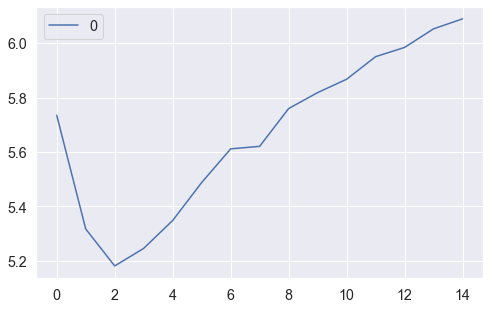

In [105]:
#plotting the rmse values against k values
import seaborn as sns

sns.set(font_scale=1.3)

curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot(figsize=(8,5))

In [106]:
#Finding the best k value.It can be also be found using GridSearch.

In [107]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_


{'n_neighbors': 2}

In [108]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

from sklearn import utils
y_train_encoded=le.fit_transform(y_train)
#print(utils.multiclass.type_of_target(y_train))
#print(utils.multiclass.type_of_target(y_train.astype('int')))
#print(utils.multiclass.type_of_target(y_train_encoded))

#Train the model using the training sets
knn.fit(X_train,y_train_encoded)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [109]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 378.33
Mean Squared Error: 225025.87
Root Mean Squared Error: 474.37


In [110]:
print('r2_score:',r2_score(y_test,y_pred))

r2_score: -1612.8539325352267


# Ridge Regression

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [112]:
y= cars['Price'].values.reshape(-1,1)
X= cars[['CompanyName','Location','Year','engine','Power','mileage','Kilometers_Driven','Seats','LPG','Diesel','Petrol','Manual','Fourth & Above','Second','Third']]
lr=LinearRegression()
MSEs=cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)
mean_MSE=np.mean(MSEs)
print(mean_MSE)

-43.01879797927877


In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [114]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-42.95951427117475


# CONCLUSION

In [115]:
##we get max r2 score 0.9231 using random forest regressor and gradient booster regressor

In [118]:
#As we can see from the above models,
#the highest accuracy is produced by random forest Regressor Model and grdient booster regressor model and bagging regressor.
#We will predict our data using that model only.